In [38]:
# first import os and enable the necessary flags to avoid cv2 errors

import os
os.environ["OPENCV_IO_ENABLE_OPENEXR"]="1"
import cv2

# then just type in following
PATHPRE = 'C:/thtg/tg/Renderer/neural-rays/Results/22_11/'
# FILENAMES = ['chocolate_milk.exr', 'ketchup.exr', 'potato.exr', 'chocolate_milk_ref.exr', 'ketchup_ref.exr', 'potato_ref.exr']
FILENAMES = ['ref.exr', '1mm.exr', '5mm.exr', '10mm.exr', '50mm.exr', '100mm.exr']

PATH2EXR = PATHPRE + FILENAMES[0]
img = cv2.imread(PATH2EXR, cv2.IMREAD_ANYCOLOR | cv2.IMREAD_ANYDEPTH)
'''
you might have to disable following flags, if you are reading a semantic map/label then because it will convert it into binary map so check both lines and see what you need
''' 
# img = cv2.imread(PATH2EXR) 
 
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

In [39]:
tmp = img[0]
print(tmp.min())
print(img.max(axis=(0,1)))
print(img.shape[2])

0.0
[34.58813  21.251673 18.665709]
3


In [3]:
images = []
for i in range(len(FILENAMES)):
    PATH2EXR = PATHPRE + FILENAMES[i]
    img = cv2.imread(PATH2EXR, cv2.IMREAD_ANYCOLOR | cv2.IMREAD_ANYDEPTH)
    if(i > 2):
        m_max = img.max(axis=(0,1))
        for j in range(img.shape[2]):
            img[:,:,j] = (img[:,:,j]/m_max[j]) * images[i%3][:,:,j]
    
    images.append(img)


In [40]:
import matplotlib.pyplot as plt
import numpy as np

In [48]:
def plot_rgb_intensities(image, name):
    # Get the dimensions of the image
    height, width, _ = image.shape

    # Extract RGB intensities from the center to the right
    center_col = width // 2
    center_row = height //2
    # intensities = image[center_row, center_col:, :]
    intensities = image[center_row, center_col-200:center_col+200, :]
    # Calculate the average intensity for each channel
    avg_intensities = np.mean(intensities, axis=(0, 1))

    # Plot the RGB intensities
    channels = ['Red', 'Green', 'Blue']
    plt.plot(intensities[:400,0], color='red',   marker='s', linestyle='-', markersize=2)
    plt.plot(intensities[:400,1], color='green', marker='s', linestyle='-', markersize=2)
    plt.plot(intensities[:400,2], color='blue',  marker='s', linestyle='-', markersize=2)
    plt.title(name)
    plt.xlabel('Distances')
    plt.ylabel('Intensities')# Add a legend
    # plt.legend(loc='upper left', fontsize=10)

    # Add grid lines
    plt.grid(True, linestyle='--', alpha=0.7)

    # Customize tick parameters
    plt.tick_params(axis='both', which='both', labelsize=10)

    # Set a background color
    plt.gca().set_facecolor('#f0f0f0')
    plt.show()

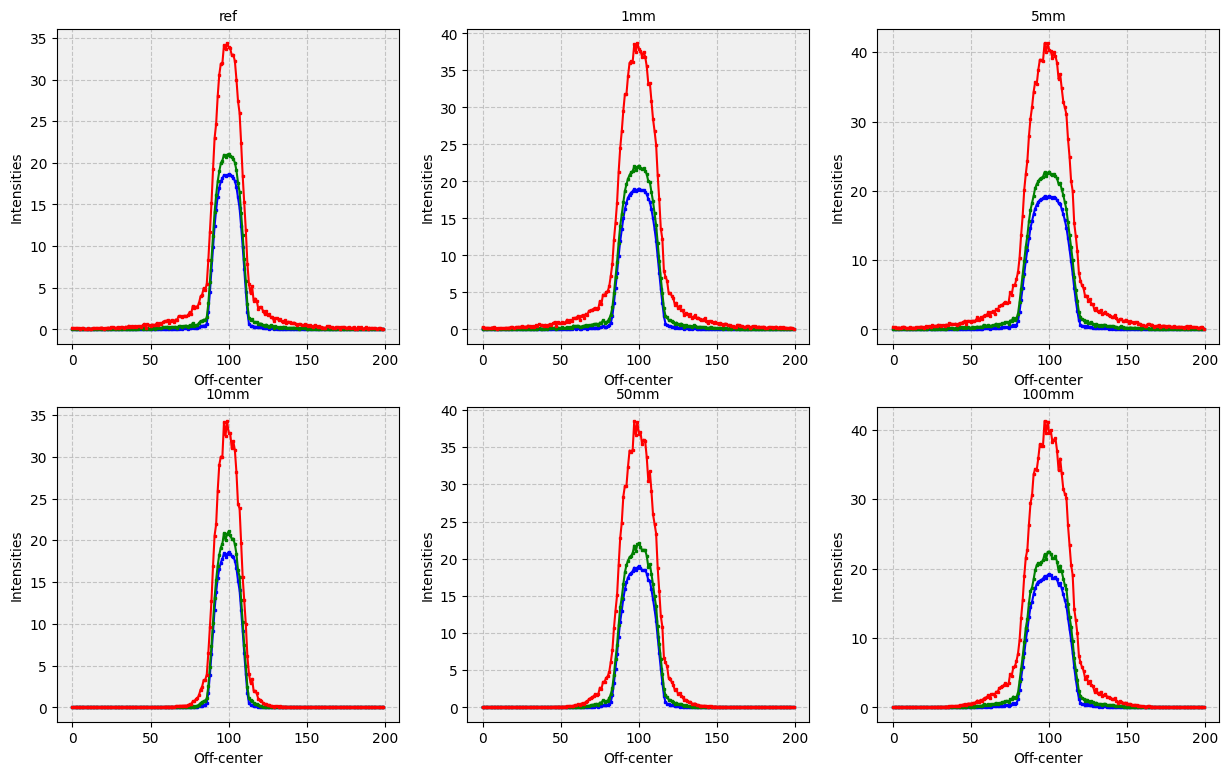

In [50]:
plt.figure(figsize=(15, 9))
for i in range(len(FILENAMES)):
    plt.subplot(2,3,i+1)
    # plot_rgb_intensities(images[i, FILENAMES[i]])
    height, width, _ = images[i].shape

    # Extract RGB intensities from the center to the right
    center_col = width // 2
    center_row = height //2
    intensities = images[i][center_row, center_col-100:center_col+100, :]
    # Calculate the average intensity for each channel
    avg_intensities = np.mean(intensities, axis=(0, 1))

    # Plot the RGB intensities
    channels = ['Red', 'Green', 'Blue']
    plt.plot(intensities[:,0], color='red',   marker='s', linestyle='-', markersize=2)
    plt.plot(intensities[:,1], color='green', marker='s', linestyle='-', markersize=2)
    plt.plot(intensities[:,2], color='blue',  marker='s', linestyle='-', markersize=2)
    plt.title(FILENAMES[i][:-4], fontsize = 10)
    plt.xlabel('Off-center')
    plt.ylabel('Intensities')# Add a legend
    # plt.legend(loc='upper left', fontsize=10)

    # Add grid lines
    plt.grid(True, linestyle='--', alpha=0.7)

    # Customize tick parameters
    plt.tick_params(axis='both', which='both', labelsize=10)

    # Set a background color
    plt.gca().set_facecolor('#f0f0f0')
plt.savefig("../Results/15_11/analysis/intensity_dist_analysis.pdf", format="pdf", bbox_inches="tight")
plt.show()
